In [61]:
from display import *
from obspy import read,UTCDateTime
import pandas as pd
import matplotlib.dates as md
from geographiclib.geodesic import Geodesic

In [62]:
dir_summary='summaries/20080302/TPUB'
tag='example'
wave_path = './waveforms/TW*TPUB*BH*20080302*'

In [63]:
def dist_to_point(pd_ls_cata, center_lat, center_lon):
    dist = []
    for i in range(len(pd_ls_cata)):
        event_lat = pd_ls_cata.iloc[i].lat
        event_lon = pd_ls_cata.iloc[i].lon
        distance = Geodesic.WGS84.Inverse(center_lat, center_lon, event_lat, event_lon)['a12'] * 111
        dist.append(distance)
    pd_ls_cata["dist_to_sta"] = dist
    return pd_ls_cata

In [64]:
def make_cumus(event_times):
    x = event_times
    c = [1] * len(x)
    y = [sum(c[0:x:1]) for x in range(len(x)+1)]
    return x, y

/home/lchuang/projects/scatnet/display.py:96: H5pyDeprecationWarning:

dataset.value has been deprecated. Use dataset[()] instead.



[0 1 4]


(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative within-clusters detections'}, ylabel='Number of events'>)

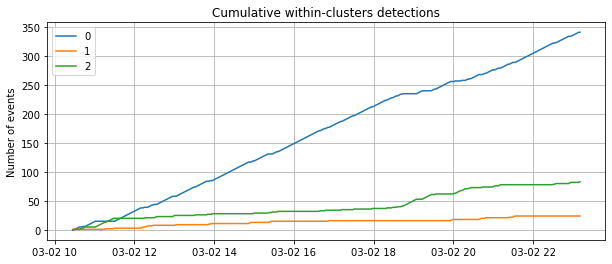

In [94]:
epoch = 1500
show_detections(dir_summary, tag, epoch=epoch, dir_output=None,save='detections_{:05d}.png', norm=None)

/home/lchuang/projects/scatnet/display.py:145: H5pyDeprecationWarning:

dataset.value has been deprecated. Use dataset[()] instead.

/home/lchuang/projects/scatnet/display.py:146: H5pyDeprecationWarning:

dataset.value has been deprecated. Use dataset[()] instead.

/home/lchuang/projects/scatnet/display.py:147: H5pyDeprecationWarning:

dataset.value has been deprecated. Use dataset[()] instead.



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Scattering latent space'}, xlabel='First latent variable', ylabel='Second latent variable'>)

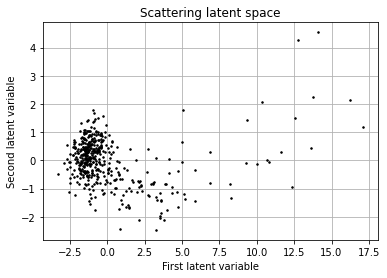

In [95]:
show_latent(dir_summary, tag, epoch=epoch, dir_output=None, save='latent.png')

/home/lchuang/projects/scatnet/display.py:257: MatplotlibDeprecationWarning:

The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



(<Figure size 432x288 with 2 Axes>,
 array([ <AxesSubplot:title={'center':'Graph time scales'}, ylabel='Patch shape'>,
        <AxesSubplot:xlabel='Layer index', ylabel='Frequency (Hz)'>], dtype=object))

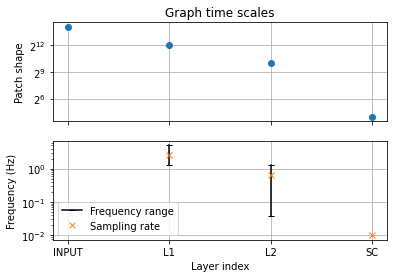

In [96]:
show_graph(dir_summary, tag, dir_output=None, save='graph.png')

In [97]:
def cluster_opt_to_pds(file_path):
    
    # ---- read in the h5py output file
    with h5py.File(file_path, 'r') as hf:
        time = hf['time'].value
        hot = hf['epoch_{:05d}'.format(epoch)]['hot'].value
    
    # ---- convert time format
    time_c = md.num2date(time)
    time_f = [UTCDateTime(t).datetime for t in time_c]
    
    # ---- conver them to a pd file
    pd_cluster = pd.DataFrame()
    pd_cluster["time"] = time_f
    pd_cluster["c_index"] = hot
    
    return pd_cluster

In [69]:
# Load cluster files
file_path = os.path.join(dir_summary, tag, 'clusters.h5')
pd_cluster = cluster_opt_to_pds(file_path)

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning:

dataset.value has been deprecated. Use dataset[()] instead.

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning:

dataset.value has been deprecated. Use dataset[()] instead.



In [70]:
from obspy.signal.tf_misfit import plot_tfr

def plot_spectrogram(file, b_time, etime, appd_secs):
    
    # ---- read wf
    tr=read(file,starttime=b_time-appd_secs,endtime=etime+65+appd_secs)
    tr=tr.detrend('demean')
    tr=tr.filter('highpass',freq=0.1)
    
    # ---- plot spectrum and spectrogram
    for i in range(len(tr)):
        plot_tfr(tr[i].data, dt=tr[i].stats.delta, fmin=0.01, 
        fmax=10, w0=8., nf=64, fft_zero_pad_fac=4)   

In [79]:
cluster_index=4
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster

index                       time  c_index
0       0 2008-03-02 10:27:18.419500        4
1       1 2008-03-02 10:29:00.819500        4
2       7 2008-03-02 10:39:15.219500        4
3       8 2008-03-02 10:40:57.619500        4
4      10 2008-03-02 10:44:22.419500        4
5      11 2008-03-02 10:46:04.819500        4
6      16 2008-03-02 10:54:36.819500        4
7      21 2008-03-02 11:03:08.819500        4
8      22 2008-03-02 11:04:51.219500        4
9      23 2008-03-02 11:06:33.619500        4
10     24 2008-03-02 11:08:16.019500        4
11     25 2008-03-02 11:09:58.419500        4
12     26 2008-03-02 11:11:40.819500        4
13     27 2008-03-02 11:13:23.219500        4
14     28 2008-03-02 11:15:05.619500        4
15     30 2008-03-02 11:18:30.419500        4
16     31 2008-03-02 11:20:12.819500        4
17     32 2008-03-02 11:21:55.219500        4
18     33 2008-03-02 11:23:37.619500        4
19     34 2008-03-02 11:25:20.019500        4
20     35 2008-03-02 11:27:02.419500        4
21     36 2008-03-02 11:28:44.819500        4
22     64 2008-03-02 12:16:32.019500        4
23     71 2008-03-02 12:28:28.819500        4
24     73 2008-03-02 12:31:53.619500        4
25     74 2008-03-02 12:33:36.019500        4
26     89 2008-03-02 12:59:12.019500        4
27     90 2008-03-02 13:00:54.419500        4
28    108 2008-03-02 13:31:37.619500        4
29    119 2008-03-02 13:50:24.019500        4
..    ...                        ...      ...
59    310 2008-03-02 19:16:22.419500        4
60    311 2008-03-02 19:18:04.819500        4
61    312 2008-03-02 19:19:47.219500        4
62    313 2008-03-02 19:21:29.619500        4
63    314 2008-03-02 19:23:12.019500        4
64    315 2008-03-02 19:24:54.419500        4
65    316 2008-03-02 19:26:36.819500        4
66    320 2008-03-02 19:33:26.419500        4
67    324 2008-03-02 19:40:16.019500        4
68    336 2008-03-02 20:00:44.819500        4
69    338 2008-03-02 20:04:09.619500        4
70    339 2008-03-02 20:05:52.019500        4
71    340 2008-03-02 20:07:34.419500        4
72    341 2008-03-02 20:09:16.819500        4
73    342 2008-03-02 20:10:59.219500        4
74    344 2008-03-02 20:14:24.019500        4
75    345 2008-03-02 20:16:06.419500        4
76    346 2008-03-02 20:17:48.819500        4
77    349 2008-03-02 20:22:56.019500        4
78    351 2008-03-02 20:26:20.819500        4
79    361 2008-03-02 20:43:24.819500        4
80    371 2008-03-02 21:00:28.819500        4
81    372 2008-03-02 21:02:11.219500        4
82    376 2008-03-02 21:09:00.819500        4
83    377 2008-03-02 21:10:43.219500        4
84    424 2008-03-02 22:30:56.019500        4
85    426 2008-03-02 22:34:20.819500        4
86    438 2008-03-02 22:54:49.619500        4
87    439 2008-03-02 22:56:32.019500        4
88    447 2008-03-02 23:10:11.219500        4

[89 rows x 3 columns]

In [80]:
import plotly.graph_objs as go

# ---- plot Lin's catalog
#lin_x, lin_y = make_cumus(pd_ls_catalog.time)
#fig = go.Figure(data=[go.Scatter(x=lin_x,
#                                 y=lin_y,
#                                 marker=dict(
#                                     size=pd_ls_catalog.mag**0.5*10,
#                                     color=pd_ls_catalog.dist_to_sta,
#                                     colorbar=dict(thickness=25,x=-0.15, len=0.8)
#                                 ),
#                                 text=pd_ls_catalog.dist_to_sta,
#                                 mode='lines+markers',
#                                 name='Lins')])
fig = go.Figure()
# ---- plot clusters
for i in pd.unique(pd_cluster.c_index):
    if i != -9:
        clst_x, clst_y = make_cumus(pd_cluster[pd_cluster.c_index==i].time)
        fig.add_traces(data=[go.Scatter(x=clst_x, y=clst_y, mode='lines+markers',name=f'clst#{i}')])
    
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [81]:
def plot_align_clusters(cluster_idx, pd_cluster, wave_path, window_len, window_appd, align=False):
    # ---- extract cluster info
    pd_cluster = pd_cluster[pd_cluster.c_index==cluster_idx].reset_index()
    # ---- load waveform
    st=read(wave_path)
    st.detrend('linear')
    st.taper(max_percentage=0.005)
    st.filter('highpass', freq=1)
    sampling_rate = st[2].stats.sampling_rate
    st_start_time = st[2].stats.starttime
    
    # ---- numpy placeholder
    wave = []
    for i in range(len(pd_cluster)):
        offset_b_time = UTCDateTime(pd_cluster.iloc[i].time) - st_start_time - window_appd
        offset_e_time = offset_b_time + window_len + window_appd
        offset_b_sample = int(round(offset_b_time * sampling_rate))
        offset_e_sample = int(round(offset_e_time * sampling_rate))
        wv = st[2].data[offset_b_sample:offset_e_sample]
        wave.append(wv/max(abs(wv)))
        
    # ---- align waveform by ccc
    
    return np.asarray(wave), pd_cluster

In [82]:
from scipy import signal
import matplotlib.pyplot as plt

In [87]:
wv, pd_cst = plot_align_clusters(4, pd_cluster, wave_path, 65, 5)
#corr = signal.correlate(wv[48], wv[49], mode='same')
#fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
#ax_orig.plot(wv[48])
#ax_noise.plot(wv[49], 'r')
#ax_corr.plot(corr)
#ax_corr.axhline(0.5, ls=':')
#ax_corr.set_title('Cross-correlated with rectangular pulse')
#ax_orig.margins(0, 0.1)
#fig.tight_layout()
#plt.show()

In [88]:
pd_cst[48:53]

index                       time  c_index
48    295 2008-03-02 18:50:46.419500        4
49    296 2008-03-02 18:52:28.819500        4
50    297 2008-03-02 18:54:11.219500        4
51    298 2008-03-02 18:55:53.619500        4
52    299 2008-03-02 18:57:36.019500        4

In [89]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                    z=wv,colorscale='gray'))
fig.update_layout(
    width=800,
    height=500
)
fig.show()

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



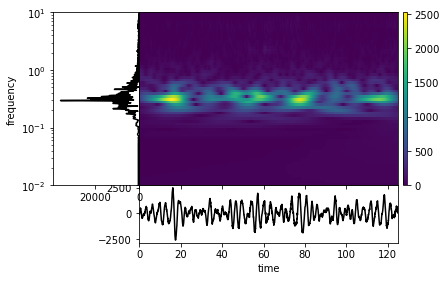

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



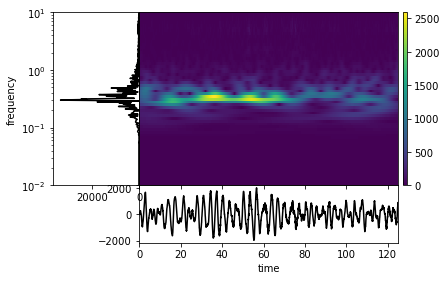

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



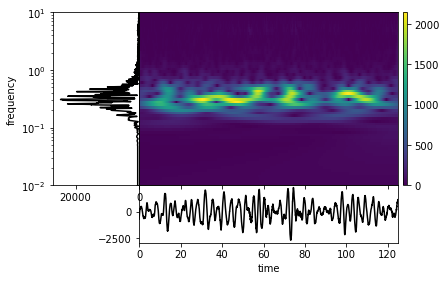

In [91]:
cluster_index=4
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[41].time)
e_time = UTCDateTime(spec_cluster.iloc[41].time)
appd_secs=30
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



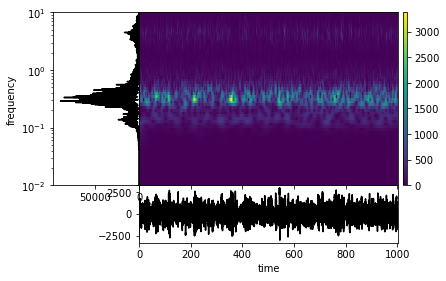

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



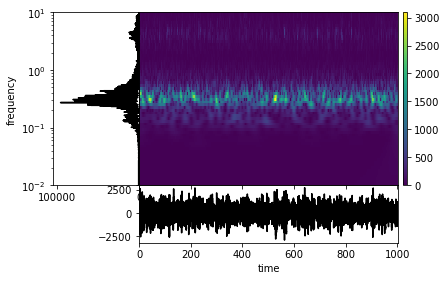

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



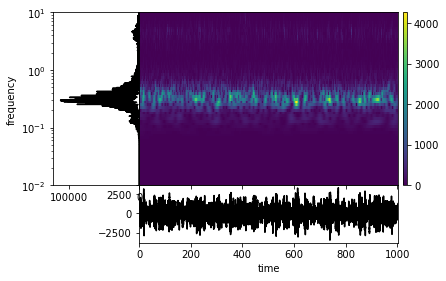

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



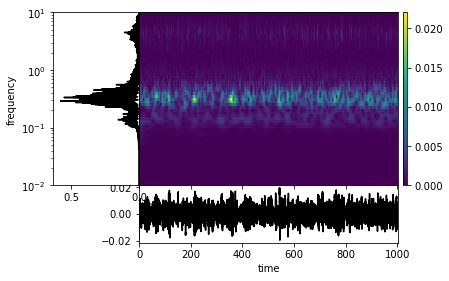

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



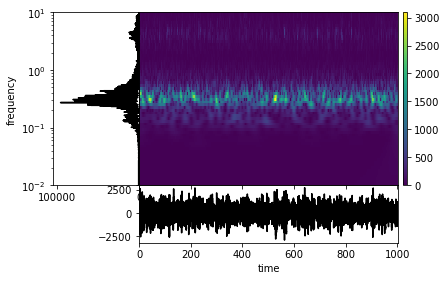

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



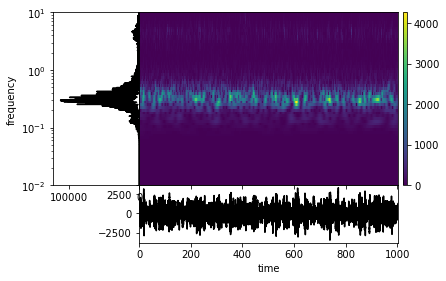

In [236]:
cluster_index=1
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[4].time)
e_time = UTCDateTime(spec_cluster.iloc[12].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



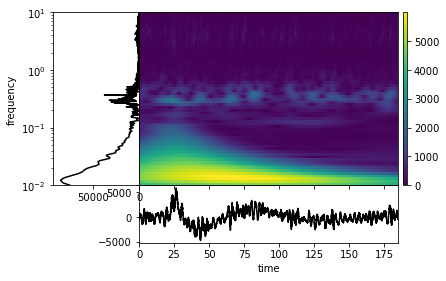

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



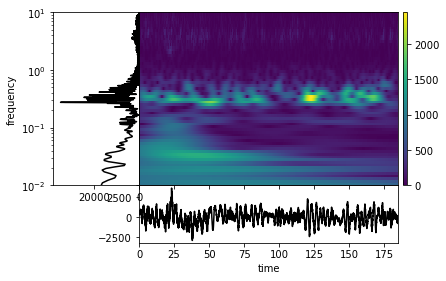

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



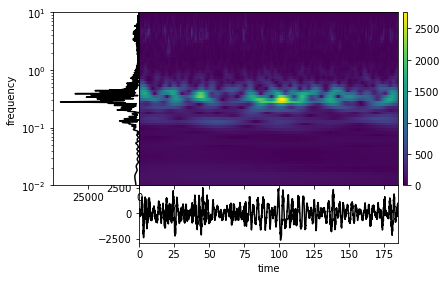

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



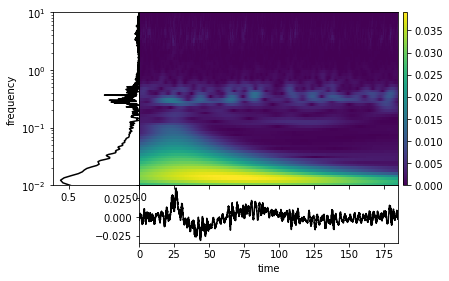

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



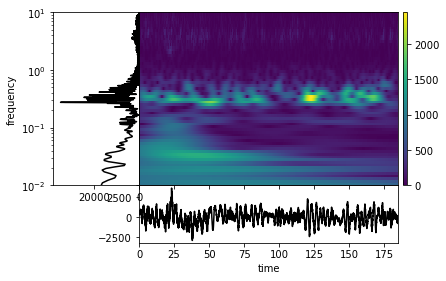

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



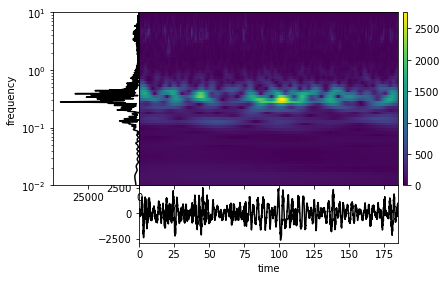

In [15]:
cluster_index=2
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[2].time)
e_time = UTCDateTime(spec_cluster.iloc[2].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

### classified as landslide (cluster 2) but not in Lin's catalog

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



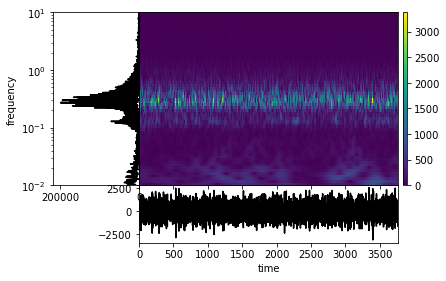

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



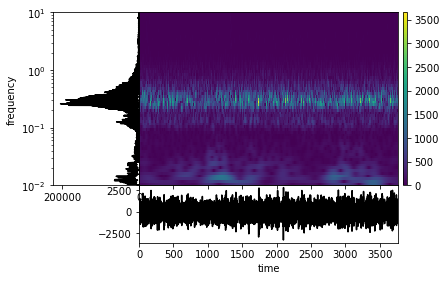

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



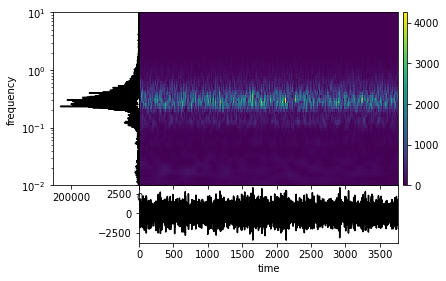

KeyboardInterrupt: 

In [16]:
cluster_index=2
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[12].time)
e_time = UTCDateTime(spec_cluster.iloc[13].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs)  

In [ ]:
cluster_index=2
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[16].time)
e_time = UTCDateTime(spec_cluster.iloc[17].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

### Landslide classified as EQ 

In [ ]:
cluster_index=1
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[18].time)
e_time = UTCDateTime(spec_cluster.iloc[21].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

In [ ]:
cluster_index=1
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[14].time)
e_time = UTCDateTime(spec_cluster.iloc[14].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

In [ ]:
cluster_index=1
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[12].time)
e_time = UTCDateTime(spec_cluster.iloc[12].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

### Earthquake classified as earthquake (cluster 1)

In [ ]:
cluster_index=1
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[1].time)
e_time = UTCDateTime(spec_cluster.iloc[1].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 